In [2]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
#################################### PACKAGES ######################################
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from cleantext import clean
import re

import nltk
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import *

# for plotting and visualization:
import matplotlib.pyplot as plt
import itertools 

from gensim.models.doc2vec import Doc2Vec, TaggedDocument


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Cleaning and more 

In [3]:
####################################### CLEANING ######################################
def cleaningTime(x):
    if isinstance(x, str):
        clean_text = x.replace('|', '')
        clean_text = clean_text.replace('+', '')
        clean_text = clean_text.replace('$', '')
        
        regex = r'\b[xX]+\b' # remove all strings of x's and X's
        regex2 = r'[=]+'
        clean_text = re.sub(regex, '', clean_text)
        clean_text = re.sub(regex2, '', clean_text)
        clean_text = re.sub('<', ' ', clean_text)
        clean_text = re.sub('>', ' ', clean_text)
        
        clean_text = re.sub(r'\d{1,2}\/\d{1,2}\/\d{2,4}', '<DATE>', clean_text)
        
        clean_text = clean(clean_text,
            no_punct=True,
            lower=True,                    # lowercase text
            no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
            no_urls=True,                  # replace all URLs with a special token
            no_emails=True,                # replace all email addresses with a special token
            no_numbers=True,
            replace_with_url="<URL>",
            replace_with_email="<EMAIL>",
            replace_with_number="<NUMBER>",
            )
        clean_text = re.sub(r"[^a-zA-Z0-9]+", ' ', clean_text) # remove all non-alphanumeric characters
        return clean_text
    else:
        return ''


####################################### TOKENIZE #########################################
def Tokenize(x):     
    tokens = nltk.word_tokenize(x)
    return tokens


######################################## REMOVING STOPWORDS ################################
stop_words = set(stopwords.words('english'))

# removing
def Remove_stopwords(x): 
    filtered_sentence = []
    for w in x:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

######################################### STEMMING ##########################################
stemmer = SnowballStemmer("english")

def Stemming_Words(x):
    stem_words = []
    for w in x:
        word = stemmer.stem(w)
        stem_words.append(word)
    return stem_words


######################################## COUNTING WORDS #####################################
def unique_words (file):
    UN = {}
    for row in file:
        for word in row:
            if word not in UN:
                UN[word] = 1
            else: 
                UN[word] += 1
    UN = dict(sorted(UN.items(), key = lambda kv: kv[1], reverse=True)) # Sorting the unique words after number of occurrences, from highest to lowest
    return UN

## Cleaning FakeNewsCorpus

In [94]:
R = pd.read_csv("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv") 
Copy_clean = R.copy() 

Copy_clean['content'] = R['content'].apply(cleaningTime)

Copy_tok = Copy_clean.copy()
Copy_tok['content'] = Copy_tok['content'].apply(Tokenize)
#print(Copy_tok['content'])

Copy_stop = Copy_tok.copy()
Copy_stop['content'] = Copy_stop['content'].apply(Remove_stopwords)

Copy_stemming = Copy_stop.copy()
Copy_stemming['content'] = Copy_stemming['content'].apply(Stemming_Words)

# number of unique words after...
print("Number of unique words after tokenization: ", len(unique_words(Copy_tok['content'])))
print("Number of unique words after removing stopwords: ", len(unique_words(Copy_stop['content'])))
print("Number of unique words after stemming: ", len(unique_words(Copy_stemming['content'])))

# reductionrates
print("Reduction of UW from tokenization to after removing stopwords (in %): ", 100 - (len(unique_words(Copy_stop['content']))/len(unique_words(Copy_tok['content'])))*100)
print("Reduction of UW from stopwords to after stemming (in %): ", 100 - (len(unique_words(Copy_stemming['content']))/len(unique_words(Copy_stop['content'])))*100)


Number of unique words after tokenization:  16589
Number of unique words after removing stopwords:  16457
Number of unique words after stemming:  10936
Reduction of UW from tokenization to after removing stopwords (in %):  0.7957079992766296
Reduction of UW from stopwords to after stemming (in %):  33.54803427113082


## Plots

{'number': 2453, 'url': 243, 'email': 104, 'date': 27}
{'number': 2453, 'one': 463, 'us': 445, 'like': 406, 'time': 393, 'peopl': 387, 'state': 366, 'trump': 348, 'use': 322, 'would': 321, 'market': 296, 'year': 293, 'also': 276, 'new': 270, 'blockchain': 260, 'make': 258, 'url': 243, 'think': 234, 'thing': 233, 'said': 232, 'report': 232, 'go': 232, 'way': 228, 'mani': 227, 'govern': 225, 'even': 216, 'nation': 213, 'take': 212, 'next': 212, 'get': 211, 'see': 203, 'presid': 202, 'could': 201, 'work': 191, 'say': 191, 'stock': 188, 'american': 186, 'two': 185, 'world': 184, 'may': 184, 'need': 183, 'first': 183, 'day': 182, 'right': 181, 'life': 177, 'power': 171, 'want': 169, 'look': 164, 'help': 157, 'come': 156, 'countri': 154, 'well': 154, 'includ': 152, 'bitcoin': 151, 'feel': 151, 'fact': 149, 'person': 148, 'war': 147, 'bank': 146, 'obama': 146, 'good': 144, 'search': 143, 'back': 142, 'headlin': 142, 'sourc': 142, 'much': 142, 'call': 137, 'part': 134, 'support': 134, 'exceed'

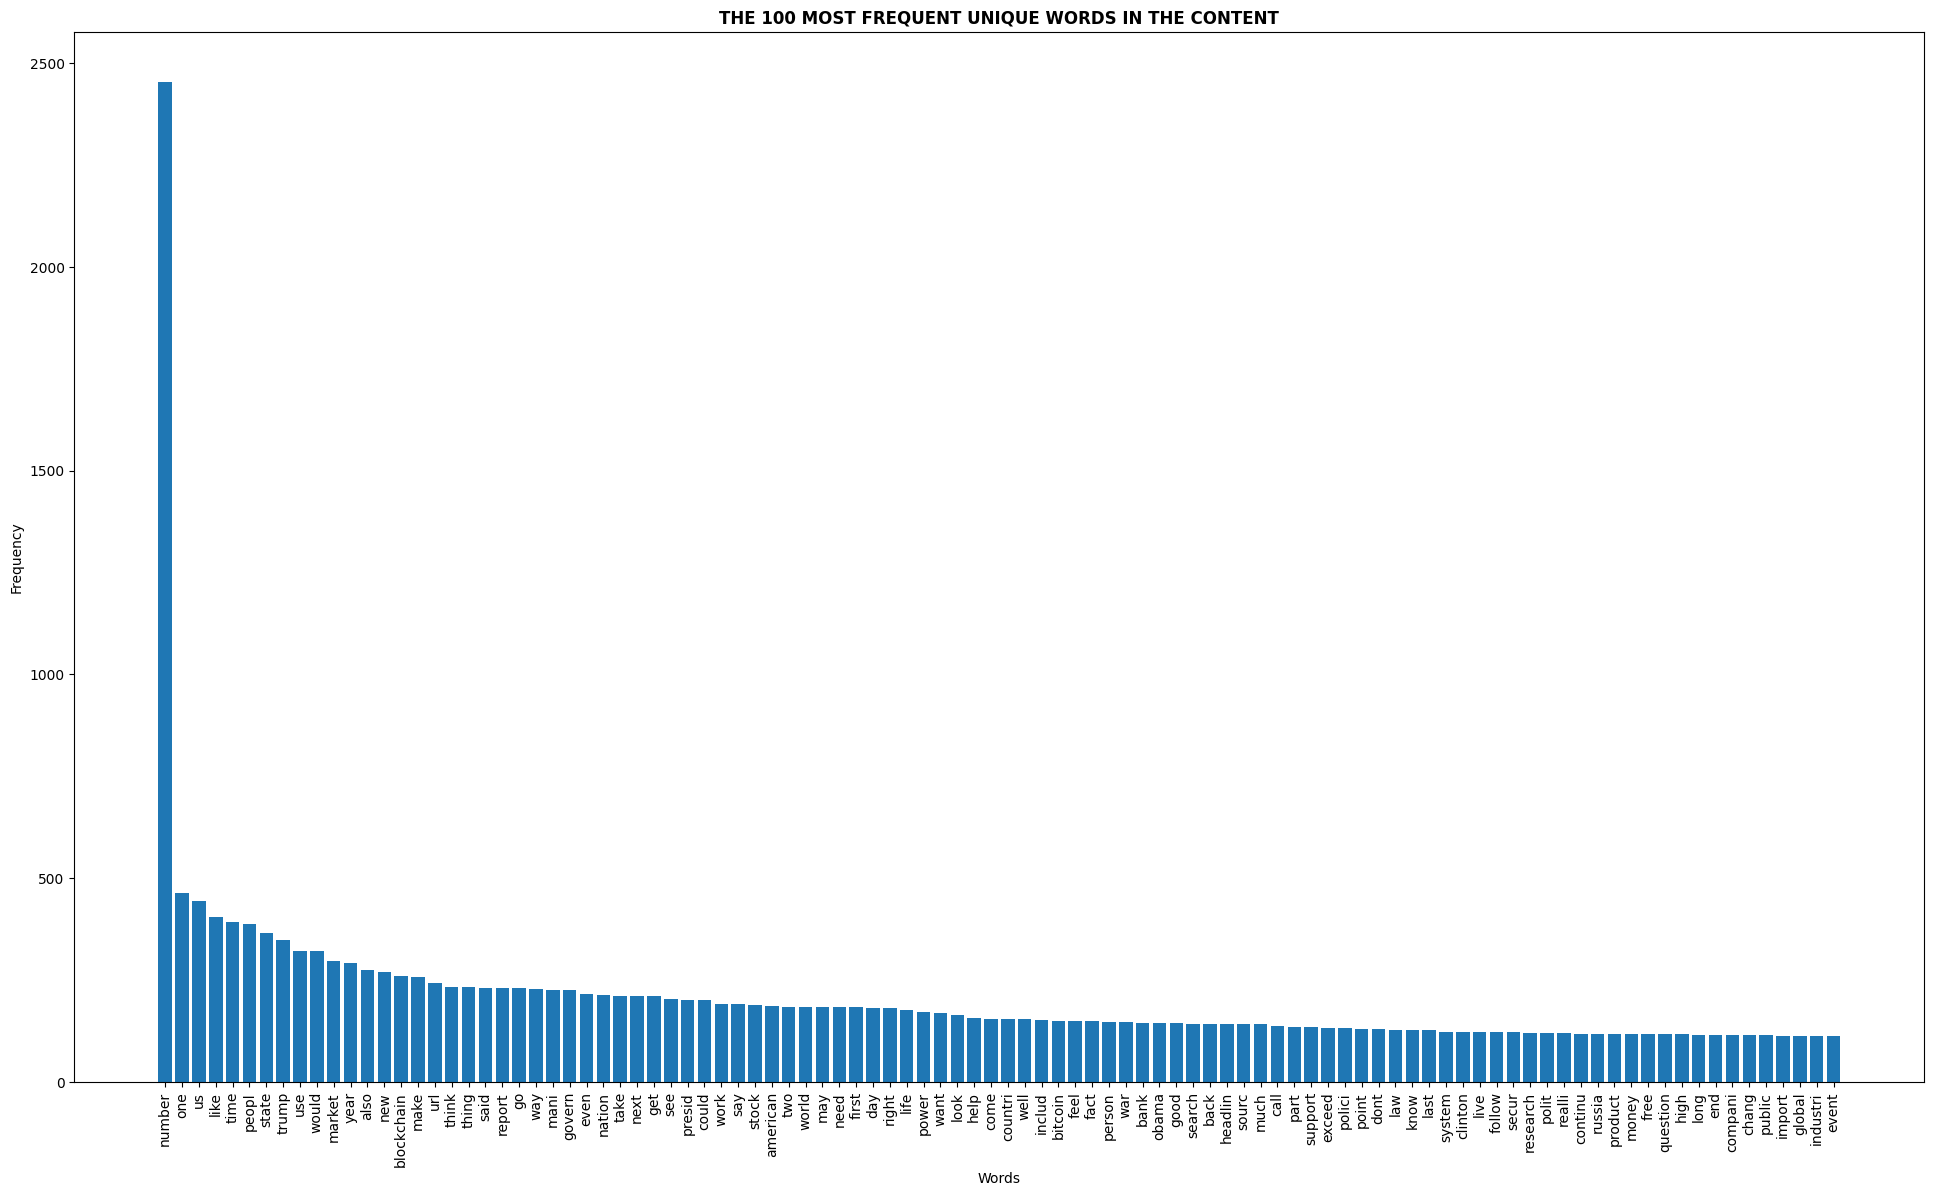

{'one': 463, 'us': 445, 'like': 406, 'time': 393, 'peopl': 387, 'state': 366, 'trump': 348, 'use': 322, 'would': 321, 'market': 296, 'year': 293, 'also': 276, 'new': 270, 'blockchain': 260, 'make': 258, 'url': 243, 'think': 234, 'thing': 233, 'said': 232, 'report': 232, 'go': 232, 'way': 228, 'mani': 227, 'govern': 225, 'even': 216, 'nation': 213, 'take': 212, 'next': 212, 'get': 211, 'see': 203, 'presid': 202, 'could': 201, 'work': 191, 'say': 191, 'stock': 188, 'american': 186, 'two': 185, 'world': 184, 'may': 184, 'need': 183, 'first': 183, 'day': 182, 'right': 181, 'life': 177, 'power': 171, 'want': 169, 'look': 164, 'help': 157, 'come': 156, 'countri': 154, 'well': 154, 'includ': 152, 'bitcoin': 151, 'feel': 151, 'fact': 149, 'person': 148, 'war': 147, 'bank': 146, 'obama': 146, 'good': 144, 'search': 143, 'back': 142, 'headlin': 142, 'sourc': 142, 'much': 142, 'call': 137, 'part': 134, 'support': 134, 'exceed': 133, 'polici': 132, 'point': 130, 'dont': 130, 'law': 129, 'know': 12

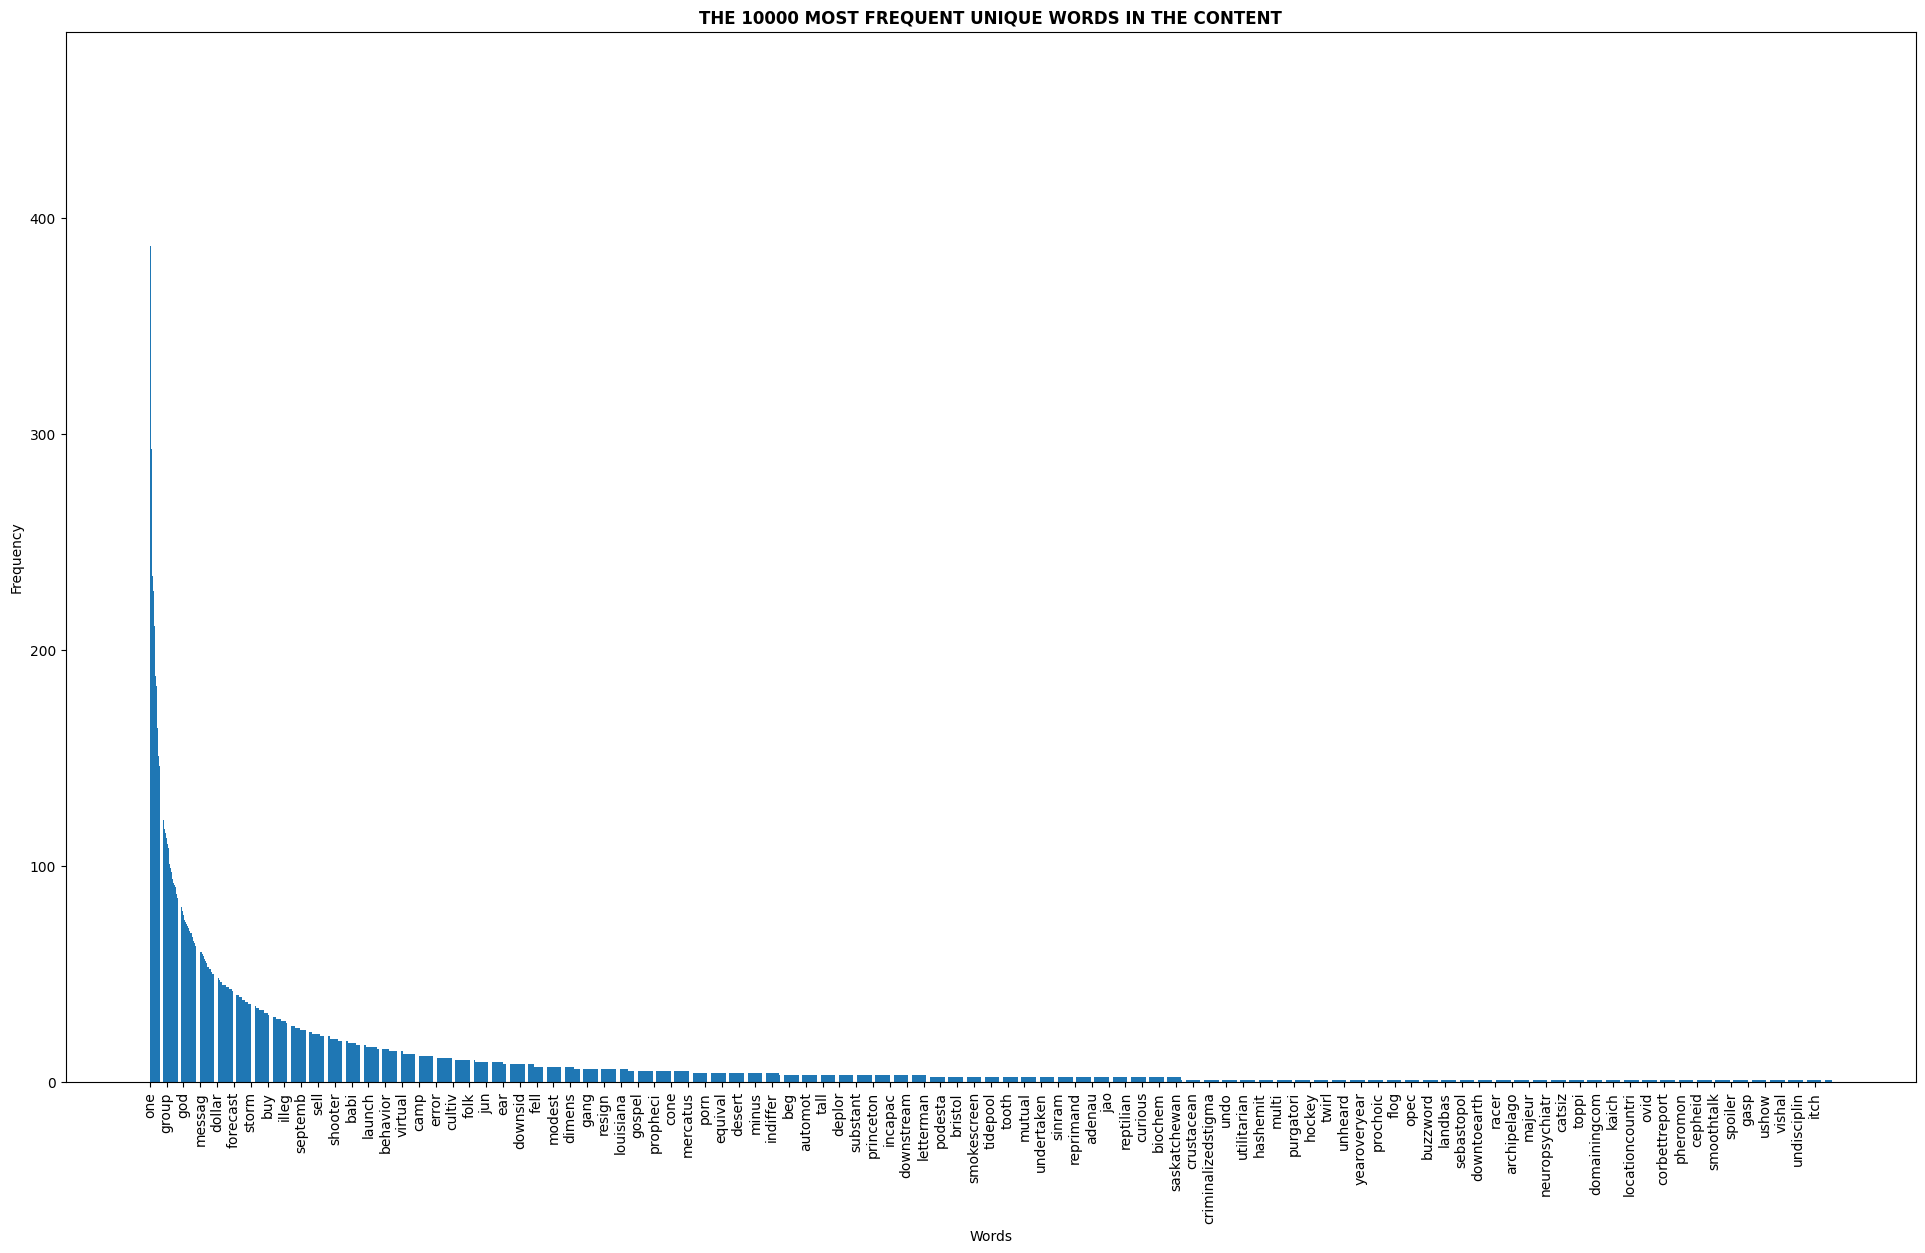

In [92]:
# COUNTING
count = 0 
wordlist = ['url', 'number', 'email', 'date']
D = {}
for i in Copy_stemming['content']:
    for x in i:
        if x in wordlist and x not in D:
            D[x] = 1
        elif x in wordlist and x in D:
            D[x] += 1
        else:
            None            
print(D)


# THE 100 MOST FREQUENT WORDS IN CONTENT
UW_stemming = unique_words(Copy_stemming['content'])
the_hundred = dict(itertools.islice(UW_stemming.items(), 100))
print(the_hundred)

# PLOT
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) 
words = the_hundred.keys() 
count = the_hundred.values()
ax.bar(words,count)
ax.set_title('THE 100 MOST FREQUENT UNIQUE WORDS IN THE CONTENT', fontsize=12, fontweight='bold') # title
ax.set_xlabel('Words') # x-axis label
ax.set_ylabel('Frequency') # y-axis label
plt.xticks(rotation= 'vertical')
fig.set_size_inches(18.5, 10.5) # size of the plot
plt.show()

# THE 10000 MOST FREQUENT WORDS IN CONTENT
the_tenthousand = dict(itertools.islice(UW_stemming.items(), 10000))
del the_tenthousand['number'] # deleting the word 'number' from the dictionary
print(the_tenthousand)

# PLOT
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
words = the_tenthousand.keys()
count = the_tenthousand.values()
ax.bar(words,count)
ax.set_title('THE 10000 MOST FREQUENT UNIQUE WORDS IN THE CONTENT', fontsize=12, fontweight='bold') # title
ax.set_xlabel('Words') # x-axis label
ax.set_ylabel('Frequency') # y-axis label
plt.xticks(range(0, 10000, 100), list(the_tenthousand.keys())[::100], rotation='vertical') # x-axis labels every 100 words
fig.set_size_inches(18.5, 10.5) # size of the plot
plt.show()


# 2 Million articles

In [4]:
df = pd.read_csv('df2_clean_tok_stop_stem.csv', usecols=['content', 'type', 'title'])
df

C:\Users\Peter\AppData\Local\Temp\ipykernel_11956\1582229614.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df2_clean_tok_stop_stem.csv', usecols=['content', 'type', 'title'])


,type,content,title
0,rumor,"['life', 'illus', 'least', 'quantum', 'level',...",Is life an ILLUSION? Researchers prove 'realit...
1,hate,"['unfortun', 'hasnt', 'yet', 'attack', 'islam'...",Donald Trump
2,hate,"['los', 'angel', 'polic', 'depart', 'deni', 'n...",Donald Trump
3,hate,"['white', 'hous', 'decid', 'quiet', 'withdraw'...","MORE WINNING! Israeli intelligence source, DEB..."
4,hate,"['time', 'come', 'cut', 'tongu', 'support', 'p...","“Oh, Trump, you coward, you just wait, we will..."
...,...,...,...
1999995,unknown,"['emili', 'keeler', 'found', 'curat', 'million...",Emily Keeler
1999996,unknown,"['new', 'inquiri', 'new', 'inquiri', 'space', ...",Chloe Wyma
1999997,bias,"['eric', 'london', 'wide', 'rang', 'nomin', 'l...",Defend Democracy Press
1999998,unknown,"['given', 'choic', 'white', 'black', 'could', ...","In a Mirror, Darkly"


In [12]:
# Remove articles with missing 'type' values
df = df[df['type'].notna()]

# Remove articles with 'type' values = 'unknown'
df = df[df['type'] != 'unknown']

In [13]:
# Print number of duplicates
print("Number of duplicates: ", df.duplicated(subset=['title', 'content']).sum())

Number of duplicates:  196915


In [14]:
# Remove duplicate articles based on 'title' and 'content' columns
df.drop_duplicates(subset=['title', 'content'], inplace=True)

# Print sum of articles for all types
print("Total # of articles: ", df['type'].value_counts().sum())

Total # of articles:  1551222


In [15]:
# Make a new column 'label' and assign 1 to all rows with 'type' = 'fake' or 'conspiracy' or 'junksci' or 'hate' or 'unreliable' or 'rumor' and 0 to all other rows
df['label'] = df['type'].apply(lambda x: 1 if x in ['fake', 'conspiracy', 'junksci', 'hate', 'unreliable', 'rumor'] else 0)

FIRST TRAIN TEST VAIDATION SPLIT METHOD

In [16]:
# Split the data into training, validation and test sets
train_set = df.sample(frac=0.8, random_state=0)
new_df2 = df.drop(train_set.index)
validation_set = new_df2.sample(frac=0.5, random_state=0)
test_set = new_df2.drop(validation_set.index)

print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

(1240978, 4)
(155122, 4)
(155122, 4)


SECOND TRAIN TEST VAIDATION SPLIT METHOD

In [ ]:
#split into train test and validation from df2_clean_tok_stop_stem.csv
#first make variable for the X and y
X = df['content']
y = df['label']

#split into train test and validation with 80 10 10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Models

#### TD-IDF 

In [ ]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the training set
X_train = vectorizer.fit_transform(train_set['content'])
y_train = train_set['label']

# Fit the vectorizer on the validation set
X_val = vectorizer.transform(validation_set['content'])
y_val = validation_set['label']

# Fit the vectorizer on the test set
X_test = vectorizer.transform(test_set['content'])
y_test = test_set['label']

#type(train_set['content'][0])

In [37]:
# Use TF-IDF to transform the data
tfidf_transformer = TfidfTransformer()

# Fit the transformer on the training set
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
#y_train = train_set['label']

# Fit the transformer on the validation set
X_val_tfidf = tfidf_transformer.transform(X_val)
#y_val = validation_set['content']

# Fit the transformer on the test set
X_test_tfidf = tfidf_transformer.transform(X_test)
#y_test = test_set['label']

In [ ]:
# instead of using CountVectorizer and TfidfTransformer, we can use TfidfVectorizer - it does both in one step
X_train_tfidf = TfidfVectorizer(tokenizer=None)
tfidf_matrix = X_train_tfidf.fit_transform(train_set['content'])
y_train = train_set['label']

#### Naive Bayes

In [40]:
# Train a Naive Bayes classifier with tf-idf data

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Predict the labels for the validation set
predicted = clf.predict(X_val_tfidf)

# Calculate the accuracy of the model
accuracy_score(y_val, predicted)
print("Accuracy: ", accuracy_score(y_val, predicted))

# Print the classification report
classification_report(y_val, predicted)
print("Classification report: ", classification_report(y_val, predicted))

# Print number of features
print("Number of features: ", clf.n_features_in_)

ValueError: Expected 2D array, got scalar array instead:
array=TfidfVectorizer().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Support Vector Machine

In [42]:
# Try SVM model on the training set with TF-IDF data

svm = LinearSVC(random_state=0).fit(tfidf_matrix, y_train)

# Predict the labels for the validation set
y_pred = svm.predict(X_val_tfidf)

# Print the accuracy score
print("Accuracy score: ", accuracy_score(y_val, y_pred))

# Print the classification report
classification_report(y_val, y_pred)
print("Classification report: ", classification_report(y_val, y_pred))

#### Logistic Regression

In [70]:
# Train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

LogRegFinal = LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000)

# Fit the model on the training set
LogRegFinal.fit(X_train, y_train)

# Predict the labels of the validation set
y_pred = LogRegFinal.predict(X_val)

# Print the accuracy score
print("Accuracy score: ", accuracy_score(y_val, y_pred))

# Print the classification report
classification_report(y_val, y_pred, output_dict=True)
print("Classification report: ", classification_report(y_val, y_pred))

C:\Users\karen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.8987055349982594
Classification report:                precision    recall  f1-score   support

           0       0.88      0.93      0.90     80114
           1       0.92      0.87      0.89     75008

    accuracy                           0.90    155122
   macro avg       0.90      0.90      0.90    155122
weighted avg       0.90      0.90      0.90    155122



#### Confusion Matrixes

In [ ]:
# Plot confusion matrix of the logistic regression model
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Plot confusion matrix for svm model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Document Embedding

In [ ]:
#i want to use Doc2Vec to embed the data
#i want to use the data from df2_clean_tok_stop_stem.csv

tagged_data = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(X_train)]
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, workers=4, epochs=20)

#train embedding
trained_embeddings = [model.infer_vector(doc) for doc in X_train]

# LIAR Dataset

In [67]:
# Load test.tsv file
dftsv = pd.read_csv('test.tsv', sep='\t', header=None)
# print(dftsv[1][0:10])

# new colomn for the label of the article
dftsv['label'] = dftsv[1].apply(lambda x: 1 if x in ['false', 'pants-fire', 'barely-true'] else 0)
# print(dftsv['label'][0:10])

In [68]:
# cleaning, tokenizing, removing stopwords and stemming column 2 of test.tsv file (content)
dftsv[2] = dftsv[2].astype(str)

dftsv[2] = dftsv[2].apply(cleaningTime)
dftsv[2] = dftsv[2].apply(Tokenize)
dftsv[2] = dftsv[2].apply(Remove_stopwords)
dftsv[2] = dftsv[2].apply(Stemming_Words)


In [74]:
liar_tfidf_matrix = X_train_tfidf.transform(dftsv[2].astype(str))
predictions = svm.predict(liar_tfidf_matrix)
print("Accuracy score: ", accuracy_score(dftsv['label'], predictions))

Accuracy score:  0.55327545382794


In [72]:
predictions_log = LogRegFinal.predict(liar_tfidf_matrix)
print("Accuracy score: ", accuracy_score(dftsv['label'], predictions_log))

Accuracy score:  0.56353591160221


Liar Dataset with Doc2Vec